# Part 1

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import Data
# Define the path file
data_path = r'C:\Users\Jose Zambom\OneDrive - Exel Industries\Data Analysis\Data Analytics Immersion\Python Fundamentals for Data Analyst\csv file\Prepared Data\combined_data.pkl'

# Load the combined data
df = pd.read_pickle(data_path)

# Check the df
print(df.head())

   order_id  user_id eval_set  order_number  orders_day_of_week  \
0         2   202279    prior             3                   5   
1         2   202279    prior             3                   5   
2         2   202279    prior             3                   5   
3         2   202279    prior             3                   5   
4         2   202279    prior             3                   5   

   order_hour_of_day  days_since_prior_order  product_id  add_to_cart_order  \
0                  9                     8.0     33120.0                1.0   
1                  9                     8.0     28985.0                2.0   
2                  9                     8.0      9327.0                3.0   
3                  9                     8.0     45918.0                4.0   
4                  9                     8.0     30035.0                5.0   

   reordered  ... spending_flag  median_days_since_prior_order  \
0        1.0  ...   Low spender                         

In [3]:
# Check the columns to identify potential PII
print(df.columns)

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range', 'price_range_loc',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price', 'spending_flag', 'median_days_since_prior_order',
       'order_frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'num_dependants', 'family_status', 'income'],
      dtype='object')


# Part 2

No need of drop any column as none is considered PII 

# Part 3

In [4]:
# Define states to regions
state_to_region = {
    # Northeast
    'Maine': 'Northeast', 'New Hampshire': 'Northeast', 'Vermont': 'Northeast', 
    'Massachusetts': 'Northeast', 'Rhode Island': 'Northeast', 'Connecticut': 'Northeast',
    'New York': 'Northeast', 'Pennsylvania': 'Northeast', 'New Jersey': 'Northeast',
    
    # Midwest
    'Wisconsin': 'Midwest', 'Michigan': 'Midwest', 'Illinois': 'Midwest', 
    'Indiana': 'Midwest', 'Ohio': 'Midwest', 'North Dakota': 'Midwest', 
    'South Dakota': 'Midwest', 'Nebraska': 'Midwest', 'Kansas': 'Midwest',
    'Minnesota': 'Midwest', 'Iowa': 'Midwest', 'Missouri': 'Midwest',
    
    # South
    'Delaware': 'South', 'Maryland': 'South', 'District of Columbia': 'South', 
    'Virginia': 'South', 'West Virginia': 'South', 'North Carolina': 'South', 
    'South Carolina': 'South', 'Georgia': 'South', 'Florida': 'South',
    'Kentucky': 'South', 'Tennessee': 'South', 'Mississippi': 'South', 
    'Alabama': 'South', 'Oklahoma': 'South', 'Texas': 'South', 'Arkansas': 'South', 
    'Louisiana': 'South',
    
    # West
    'Idaho': 'West', 'Montana': 'West', 'Wyoming': 'West', 'Nevada': 'West', 
    'Utah': 'West', 'Colorado': 'West', 'Arizona': 'West', 'New Mexico': 'West',
    'Alaska': 'West', 'Washington': 'West', 'Oregon': 'West', 'California': 'West', 
    'Hawaii': 'West'
}

# Create a 'Region' column based on the 'state' column
df['Region'] = df['state'].map(state_to_region)

# Check the first few rows to confirm
print(df[['state', 'Region']].head())

   state Region
0  Idaho   West
1  Idaho   West
2  Idaho   West
3  Idaho   West
4  Idaho   West


In [5]:
# Group the data by 'Region' and sum the 'prices' column to calculate total spend for each region
total_spend_by_region = df.groupby('Region')['prices'].sum()

# Display the total spend by region
print(total_spend_by_region)

Region
Midwest      2680630.2
Northeast    2051793.5
South        4108560.1
West         3392557.5
Name: prices, dtype: float64


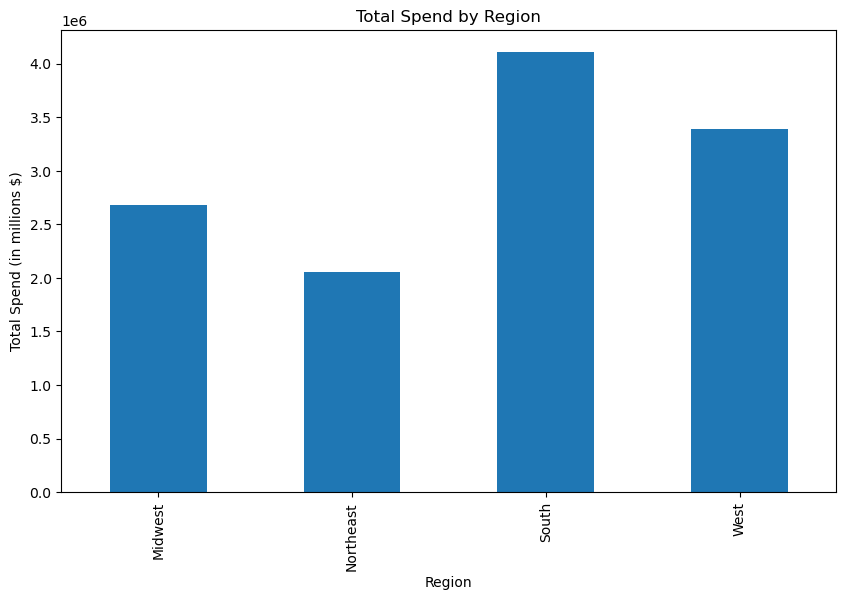

In [6]:
# Visualize the total spend using a bar chart
ax = total_spend_by_region.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.title('Total Spend by Region')
plt.xlabel('Region')
plt.ylabel('Total Spend (in millions $)')

# Remove the legend if not necessary
plt.legend().remove()

# Show the plot
plt.show()

# Part 4

In [13]:
# Check the max order data
print(df['max_order'].value_counts().sort_index())

max_order
1     43660
2     45541
3     47996
4     43784
5     40170
      ...  
95     1675
96     1552
97     1516
98     1308
99     1304
Name: count, Length: 99, dtype: int64


In [16]:
# Step 1: Create a table to display the distribution of 'max_order' values
max_order_distribution = df['max_order'].value_counts().sort_index()

# Step 2: Create a new DataFrame for better readability
max_order_table = pd.DataFrame(max_order_distribution).reset_index()

# Step 3: Rename the columns for clarity
max_order_table.columns = ['Max Orders', 'Number of Customers']

# Step 4: Add a column to flag customers with 'less than 5 orders' and '5 or more orders'
max_order_table['Exclusion'] = max_order_table['Max Orders'].apply(lambda x: 'exclude' if x < 5 else 'keep')

# Step 5: Display the table
print(max_order_table)


    Max Orders  Number of Customers Exclusion
0            1                43660   exclude
1            2                45541   exclude
2            3                47996   exclude
3            4                43784   exclude
4            5                40170      keep
..         ...                  ...       ...
94          95                 1675      keep
95          96                 1552      keep
96          97                 1516      keep
97          98                 1308      keep
98          99                 1304      keep

[99 rows x 3 columns]


In [17]:
# Apply the filter to keep only customers with 5 or more orders
df_filtered = df[df['max_order'] >= 5]

# Verify the number of rows in the filtered dataset
print("Number of rows after filtering:", df_filtered.shape[0])

# Display the first few rows of the filtered dataset
print(df_filtered.head())

Number of rows after filtering: 819019
   order_id  user_id eval_set  order_number  orders_day_of_week  \
0         2   202279    prior             3                   5   
1         2   202279    prior             3                   5   
2         2   202279    prior             3                   5   
3         2   202279    prior             3                   5   
4         2   202279    prior             3                   5   

   order_hour_of_day  days_since_prior_order  product_id  add_to_cart_order  \
0                  9                     8.0     33120.0                1.0   
1                  9                     8.0     28985.0                2.0   
2                  9                     8.0      9327.0                3.0   
3                  9                     8.0     45918.0                4.0   
4                  9                     8.0     30035.0                5.0   

   reordered  ...   order_frequency_flag  gender  state  age date_joined  \
0      

In [19]:
df_filtered.shape

(819019, 34)

In [20]:
# Define a new export path for the filtered data in CSV format
csv_export_path = r'C:\Users\Jose Zambom\OneDrive - Exel Industries\Data Analysis\Data Analytics Immersion\Python Fundamentals for Data Analyst\csv file\Prepared Data\filtered_customers.csv'

# Export the filtered dataset as a CSV file
df_filtered.to_csv(csv_export_path, index=False)

print("Filtered dataset successfully exported as a CSV file.")

Filtered dataset successfully exported as a CSV file.


# Part 5

In [22]:
# Define conditions based on age, income, number of dependents, and department purchases
conditions = [
    # Young Parent: Age 25-40, has dependents, buys from baby products department (department_id 18 is baby)
    (df['age'].between(25, 40)) & (df['num_dependants'] > 0) & (df['department_id'] == 18),
    
    # Single Adult: Age 18-35, no dependents, buys personal care or snacks (department_id 5 = personal care, 19 = snacks)
    (df['age'].between(18, 35)) & (df['num_dependants'] == 0) & (df['department_id'].isin([5, 19])),
    
    # Affluent Family: High income (above 100,000), has dependents, buys groceries (department_id 4 = produce, 16 = dairy)
    (df['income'] > 100000) & (df['num_dependants'] > 0) & (df['department_id'].isin([4, 16])),
    
    # Retired Senior: Age 60+, few dependents (0 or 1), orders from health or groceries (department_id 4 = produce, 11 = health)
    (df['age'] >= 60) & (df['num_dependants'] <= 1) & (df['department_id'].isin([4, 11])),
    
    # Busy Professional: Age 30-50, no dependents, high income, orders at late hours (order_hour_of_day > 18)
    (df['age'].between(30, 50)) & (df['num_dependants'] == 0) & (df['income'] > 80000) & (df['order_hour_of_day'] > 18)
]

# Define the corresponding customer profiles
profiles = ['Young Parent', 'Single Adult', 'Affluent Family', 'Retired Senior', 'Busy Professional']

# Create a new column 'customer_profile' based on the conditions
df['customer_profile'] = np.select(conditions, profiles, default='Other')

# Check the first few rows to verify the profiling variable
print(df[['age', 'income', 'num_dependants', 'department_id', 'order_hour_of_day', 'customer_profile']].head())


   age  income  num_dependants  department_id  order_hour_of_day  \
0   57   98119               3             16                  9   
1   57   98119               3              4                  9   
2   57   98119               3             13                  9   
3   57   98119               3             13                  9   
4   57   98119               3             13                  9   

  customer_profile  
0            Other  
1            Other  
2            Other  
3            Other  
4            Other  


# Part 6

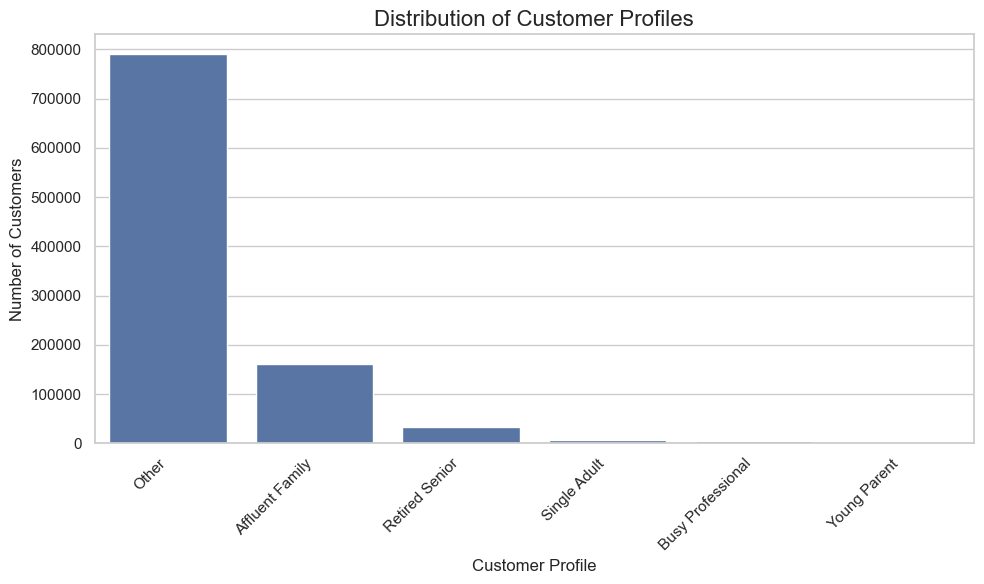

In [24]:
# Create a bar chart without the palette argument
plt.figure(figsize=(10, 6))
sns.barplot(x=profile_counts.index, y=profile_counts.values)

# Add titles and labels
plt.title('Distribution of Customer Profiles', fontsize=16)
plt.xlabel('Customer Profile', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.tight_layout()
plt.show()


# Part 7

In [25]:
# Aggregate max, mean, and min for expenditure and usage frequency at the customer profile level

# Assuming 'order_frequency_flag' is categorical, we use a different metric for frequency (like median_days_since_prior_order for numerical data)
# For usage frequency, we will use the 'median_days_since_prior_order' column
# For expenditure, we will use the 'prices' column

agg_stats = df.groupby('customer_profile').agg(
    max_expenditure=('prices', 'max'),
    mean_expenditure=('prices', 'mean'),
    min_expenditure=('prices', 'min'),
    max_frequency=('median_days_since_prior_order', 'max'),
    mean_frequency=('median_days_since_prior_order', 'mean'),
    min_frequency=('median_days_since_prior_order', 'min')
).reset_index()

# Display the aggregated statistics
print(agg_stats)

    customer_profile  max_expenditure  mean_expenditure  min_expenditure  \
0    Affluent Family          99999.0         27.052619              1.0   
1  Busy Professional          99999.0         26.072721              1.0   
2              Other          99999.0          9.394537              1.0   
3     Retired Senior             15.0          8.024582              1.0   
4       Single Adult             15.0          4.465901              1.0   
5       Young Parent             15.0          7.600804              1.1   

   max_frequency  mean_frequency  min_frequency  
0           30.0       10.712683            0.0  
1           30.0       11.029247            0.0  
2           30.0       11.065745            0.0  
3           30.0       10.570832            0.0  
4           30.0       11.148116            0.0  
5           30.0        9.771678            0.0  


# Part 8 & 9

In [26]:
# Group by 'customer_profile', 'Region', and 'department_id'
# Aggregate expenditure (prices) and count the number of orders

profile_region_dept = df.groupby(['customer_profile', 'Region', 'department_id']).agg(
    total_expenditure=('prices', 'sum'),
    total_orders=('order_id', 'count'),
    average_frequency=('median_days_since_prior_order', 'mean')  # Example for frequency
).reset_index()

# Sort the DataFrame for better readability
profile_region_dept_sorted = profile_region_dept.sort_values(by=['customer_profile', 'Region', 'total_expenditure'], ascending=[True, True, False])

# Display the results
print(profile_region_dept_sorted)


    customer_profile     Region  department_id  total_expenditure  \
1    Affluent Family    Midwest             16           659807.7   
0    Affluent Family    Midwest              4           196121.7   
3    Affluent Family  Northeast             16           702180.3   
2    Affluent Family  Northeast              4           150000.2   
5    Affluent Family      South             16          1134654.8   
..               ...        ...            ...                ...   
189     Single Adult       West              5              651.0   
191     Young Parent    Midwest             18             4084.4   
192     Young Parent  Northeast             18             3342.5   
193     Young Parent      South             18             5754.9   
194     Young Parent       West             18             4786.5   

     total_orders  average_frequency  
1           13789          10.846916  
0           24347          10.802708  
3           10515          10.793247  
2           186

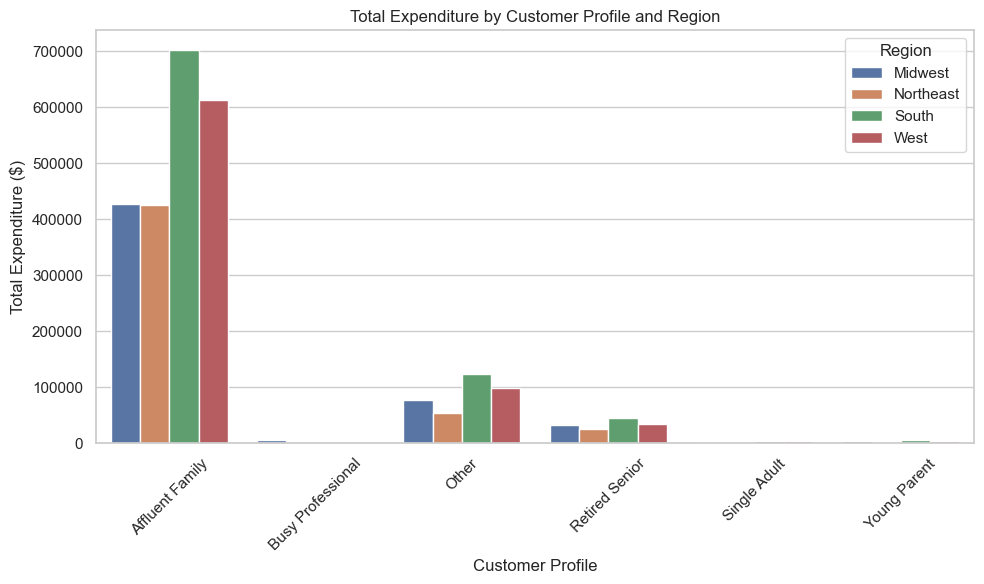

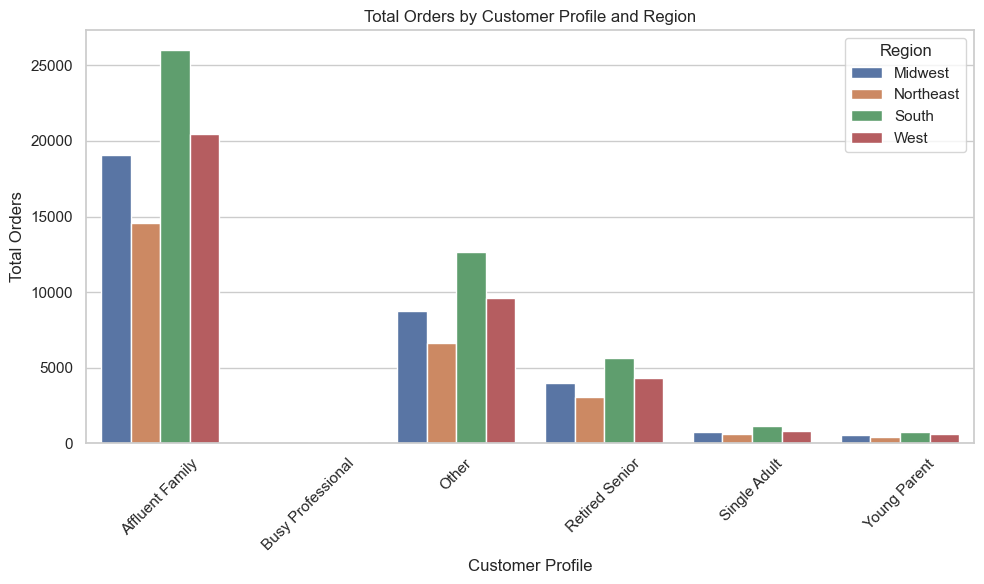

In [31]:
# Define the path for your visualization folder
visualization_folder = r'C:\Users\Jose Zambom\OneDrive - Exel Industries\Data Analysis\Data Analytics Immersion\Python Fundamentals for Data Analyst\csv file\Visualization'

# Save the total expenditure chart
expenditure_chart_path = os.path.join(visualization_folder, 'total_expenditure_by_profile_region.png')
plt.figure(figsize=(10, 6))
sns.barplot(data=profile_region_dept_sorted, x='customer_profile', y='total_expenditure', hue='Region', errorbar=None)  # Changed ci to errorbar
plt.title('Total Expenditure by Customer Profile and Region')
plt.xlabel('Customer Profile')
plt.ylabel('Total Expenditure ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(expenditure_chart_path)
plt.show()

# Save the total orders chart
orders_chart_path = os.path.join(visualization_folder, 'total_orders_by_profile_region.png')
plt.figure(figsize=(10, 6))
sns.barplot(data=profile_region_dept_sorted, x='customer_profile', y='total_orders', hue='Region', errorbar=None)  # Changed ci to errorbar
plt.title('Total Orders by Customer Profile and Region')
plt.xlabel('Customer Profile')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(orders_chart_path)
plt.show()

In [32]:
# Define the file path for the final dataset
final_data_path = os.path.join(r'C:\Users\Jose Zambom\OneDrive - Exel Industries\Data Analysis\Data Analytics Immersion\Python Fundamentals for Data Analyst\csv file\Prepared Data', 'final_combined_data.pkl')

# Export the final dataset
df.to_pickle(final_data_path)
print(f'Final dataset saved to: {final_data_path}')

Final dataset saved to: C:\Users\Jose Zambom\OneDrive - Exel Industries\Data Analysis\Data Analytics Immersion\Python Fundamentals for Data Analyst\csv file\Prepared Data\final_combined_data.pkl
